In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , RandomizedSearchCV , cross_validate
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , recall_score  , precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.pipeline import make_pipeline
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv(r"/Users/sharondineshep/Downloads/Deployment/diabetes.csv")

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.shape

(768, 9)

In [22]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

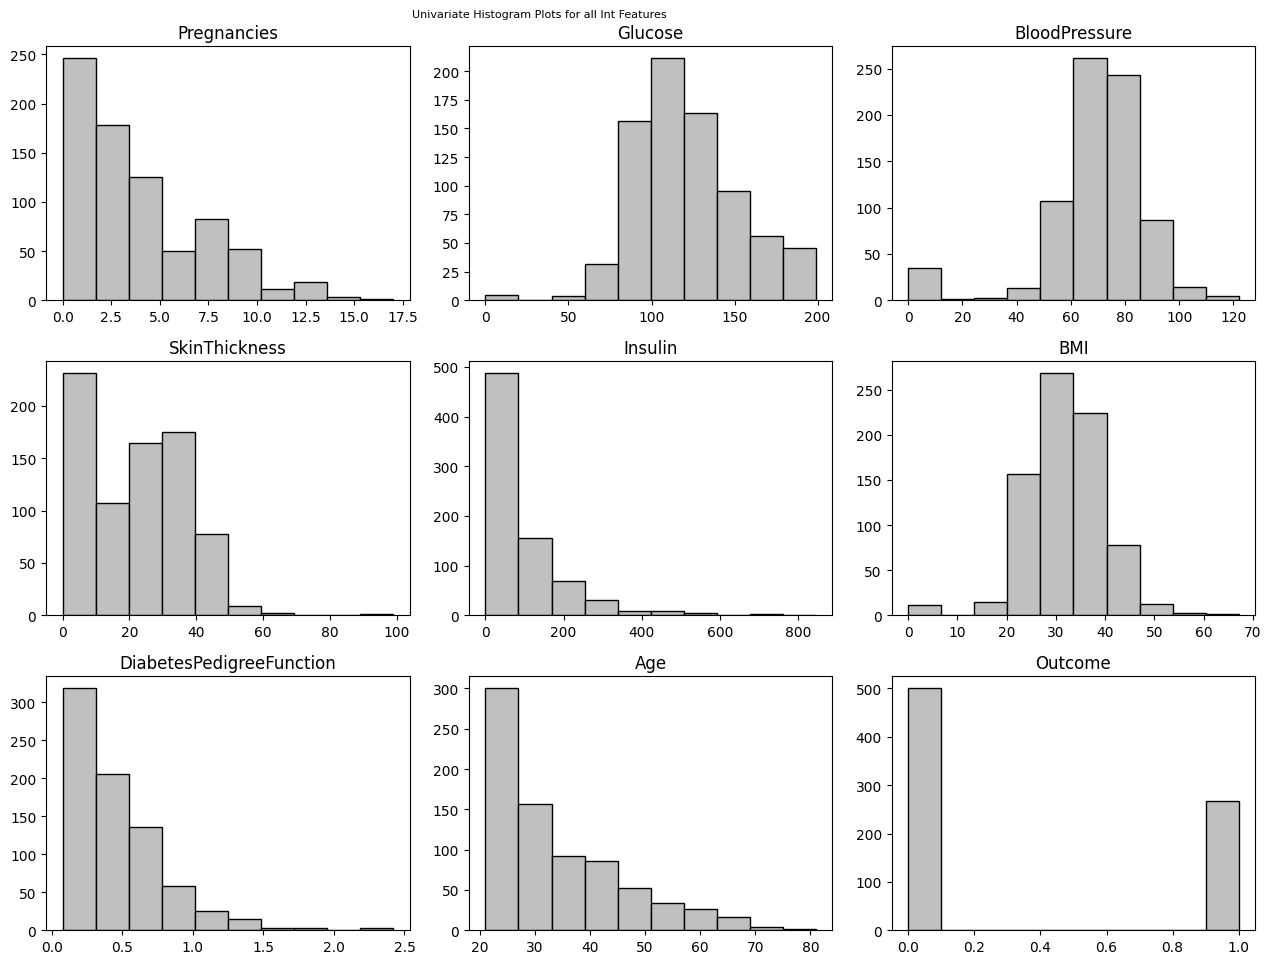

In [23]:
#Loop for plotting all the histogram of all the integer features
data.hist(bins=10, color='silver', edgecolor='black', linewidth=1.0,
              xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   
rt = plt.suptitle('Univariate Histogram Plots for all Int Features', x=0.85, y=2, fontsize=8)

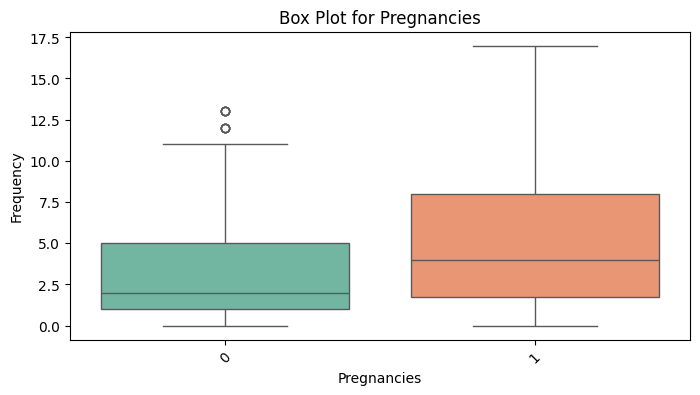

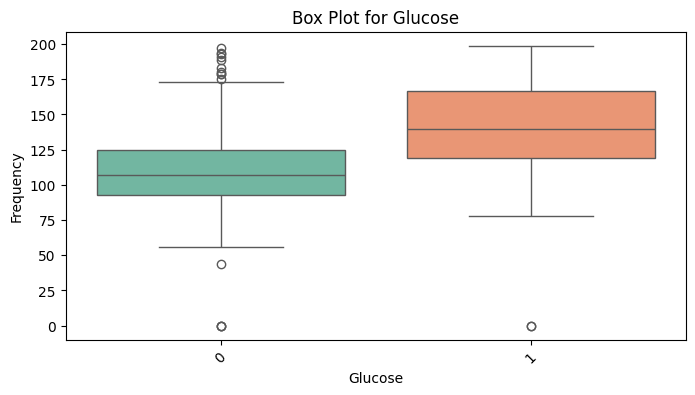

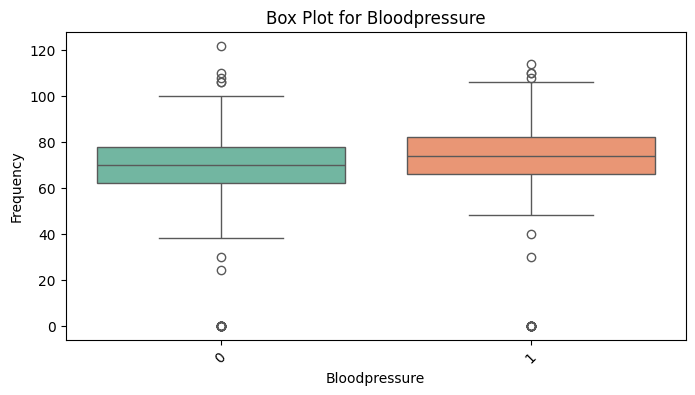

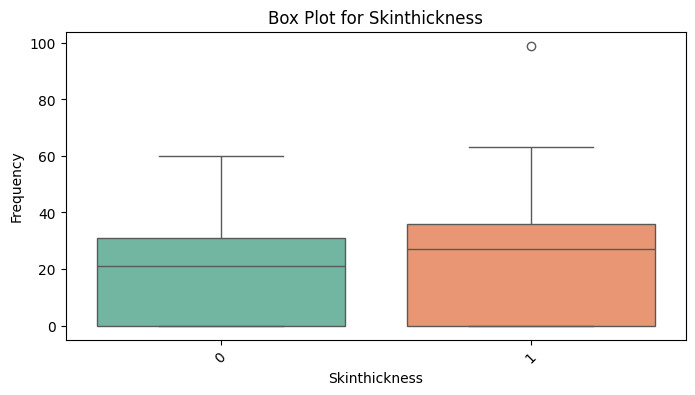

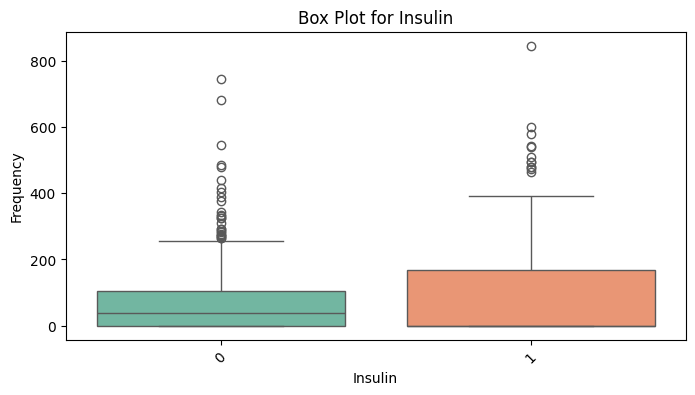

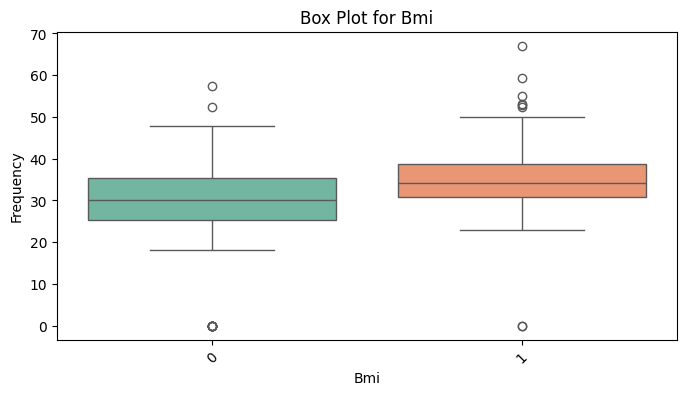

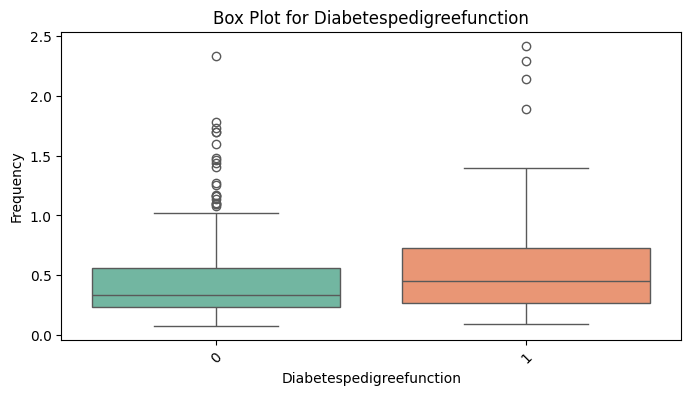

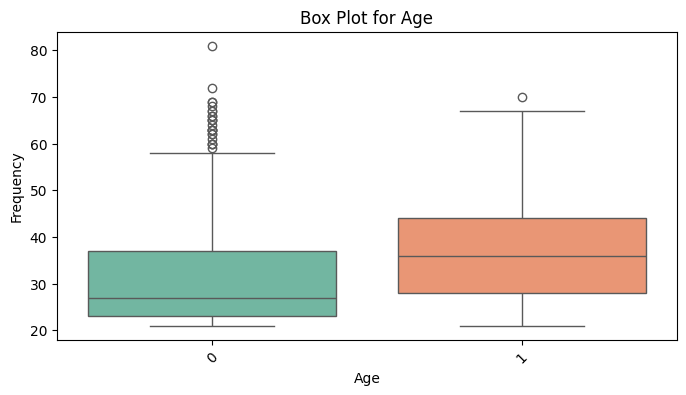

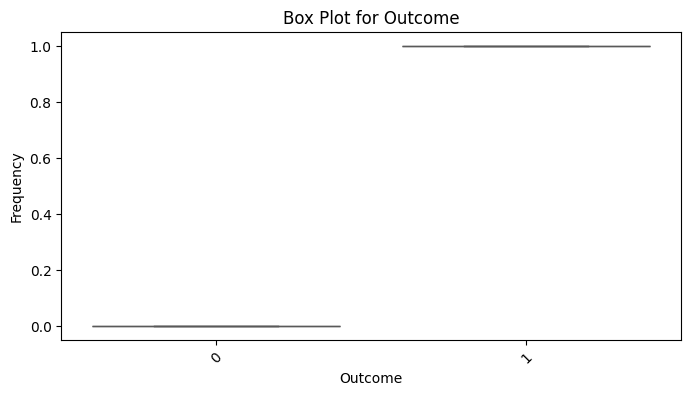

In [24]:
#Loop for plotting all the count plot of all the Category and object features.
for column in data.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='Outcome', y=column, palette='Set2')
    plt.title(f'Box Plot for {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

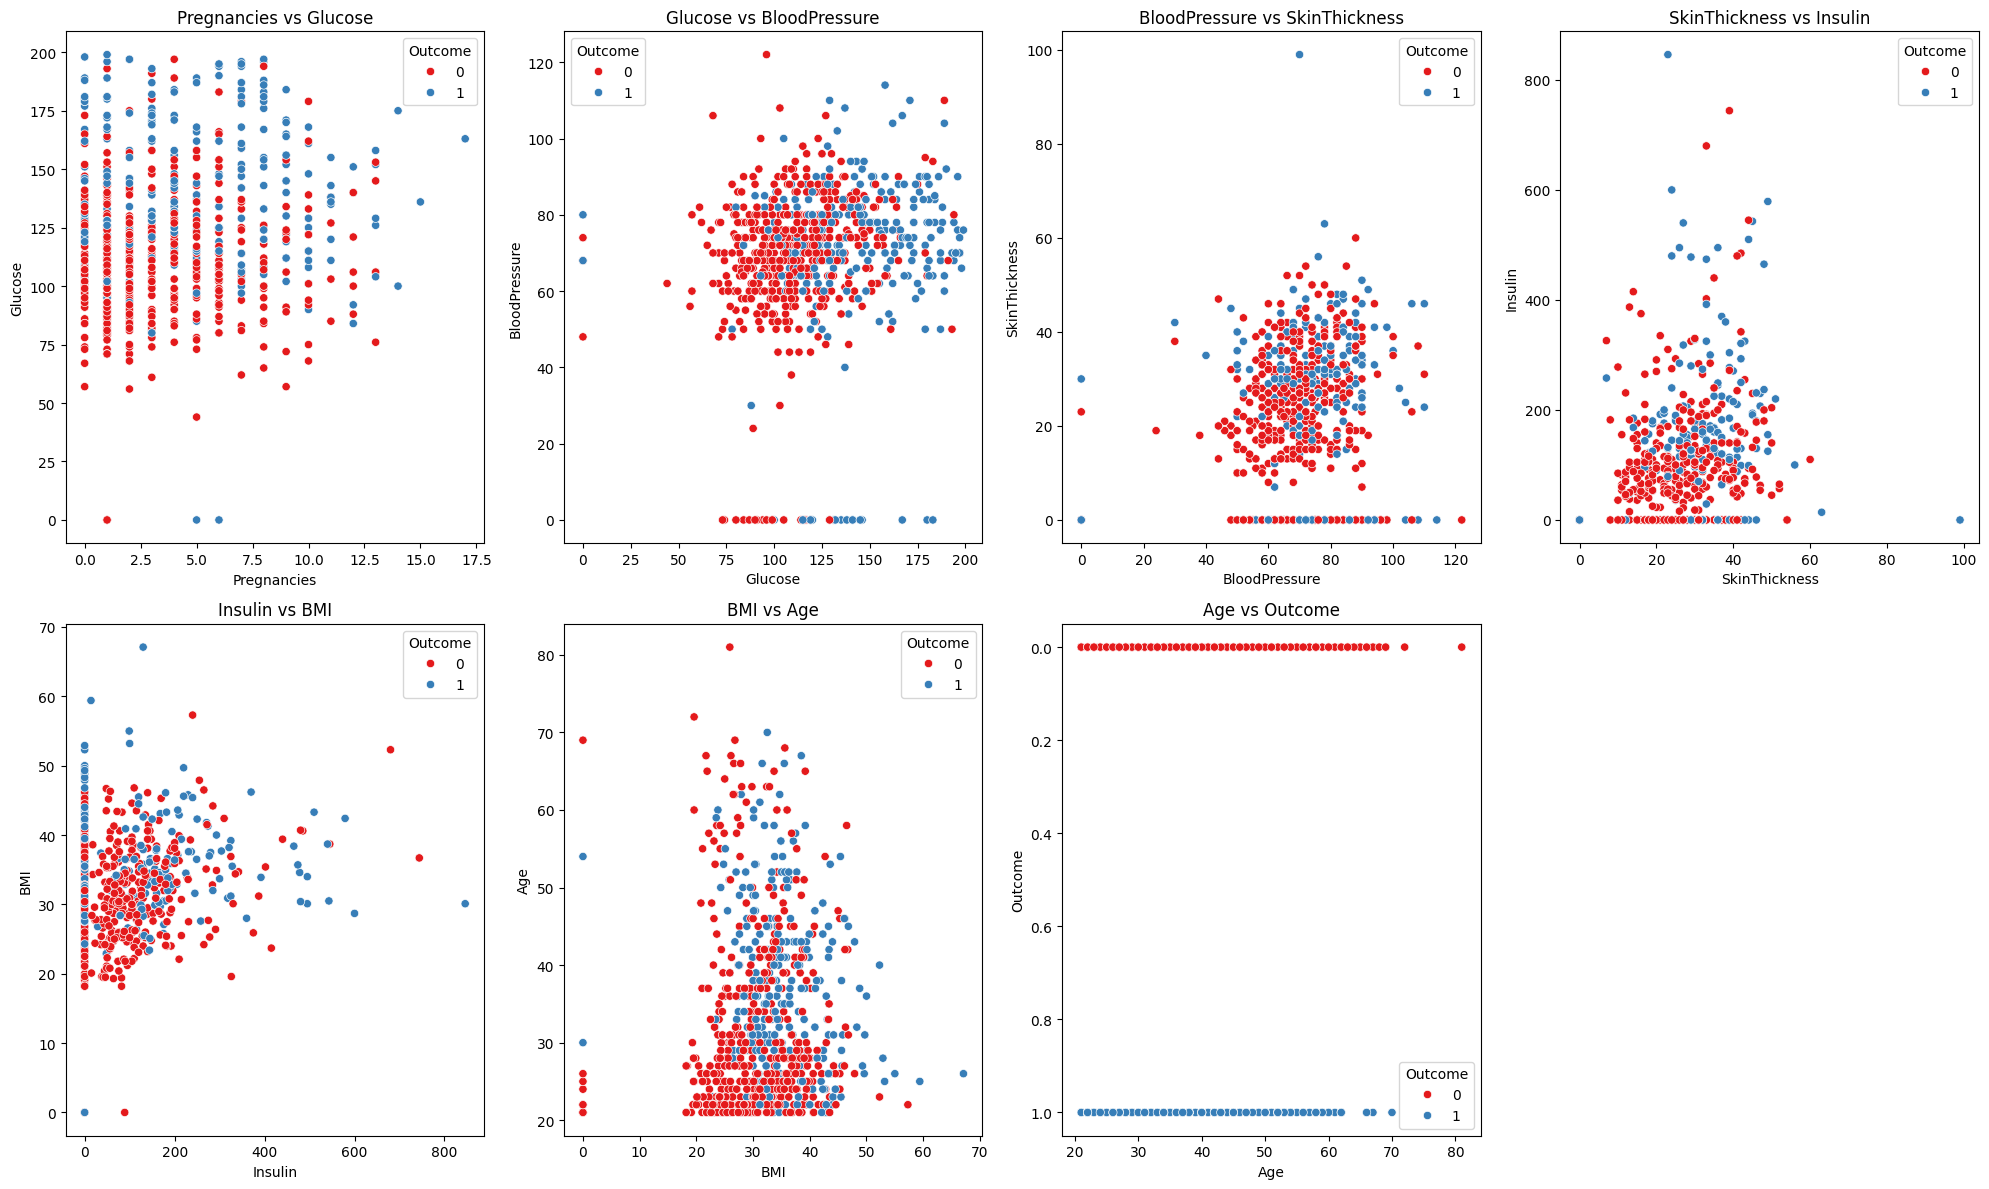

In [31]:
data['Outcome'] = data['Outcome'].astype('category')
# Define the pairs of x and y for scatterplots
plot_pairs = [
    ('Pregnancies', 'Glucose'),
    ('Glucose', 'BloodPressure'),
    ('BloodPressure', 'SkinThickness'),
    ('SkinThickness', 'Insulin'),
    ('Insulin', 'BMI'),
    ('BMI', 'Age'),
    ('Age', 'Outcome')
]

# Set up the figure
plt.figure(figsize=(20, 12))

# Loop through the plot pairs and create scatterplots
for i, (x, y) in enumerate(plot_pairs, 1):
    plt.subplot(2, 4, i)  # Create subplots (2 rows, 4 columns)
    sns.scatterplot(x=x, y=y, hue='Outcome', data=data, palette="Set1")
    plt.title(f"{x} vs {y}")  # Dynamic title

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()
